In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

shear_range is different different to change augmentation validation split is differet that allows us to randomly split a subset of your training data into a validation set

In [11]:
traingen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [12]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [13]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [14]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 128)      512       
 hNormalization)                                                 
                                                        

In [17]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [18]:
history=model.fit(traindata_generator,epochs=50,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/50
773/773 [==============================] - 42s 52ms/step - loss: 0.9236 - accuracy: 0.7161 - val_loss: 1.0951 - val_accuracy: 0.6499
Epoch 2/50
773/773 [==============================] - 25s 33ms/step - loss: 0.3082 - accuracy: 0.9040 - val_loss: 0.2764 - val_accuracy: 0.9122
Epoch 3/50
773/773 [==============================] - 28s 36ms/step - loss: 0.2036 - accuracy: 0.9352 - val_loss: 12.3221 - val_accuracy: 0.3475
Epoch 4/50
773/773 [==============================] - 26s 33ms/step - loss: 0.1774 - accuracy: 0.9444 - val_loss: 3.3334 - val_accuracy: 0.6310
Epoch 5/50
773/773 [==============================] - 26s 33ms/step - loss: 0.1357 - accuracy: 0.9549 - val_loss: 0.1690 - val_accuracy: 0.9428
Epoch 6/50
773/773 [==============================] - 24s 31ms/step - loss: 0.1179 - accuracy: 0.9606 - val_loss: 0.3048 - val_accuracy: 0.9038
Epoch 7/50
773/773 [==============================] - 24s 31ms/step - loss: 0.1068 - accuracy: 0.9645 - val_loss: 1.1908 - val_accuracy

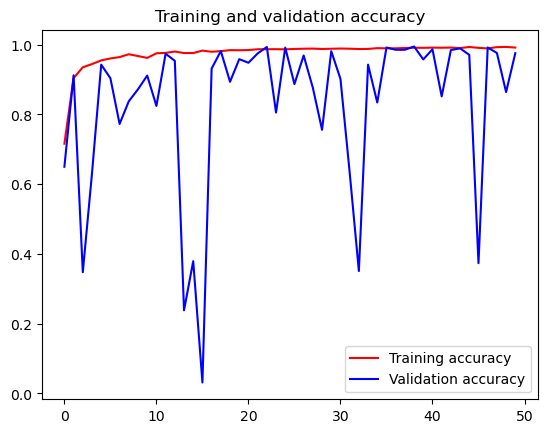

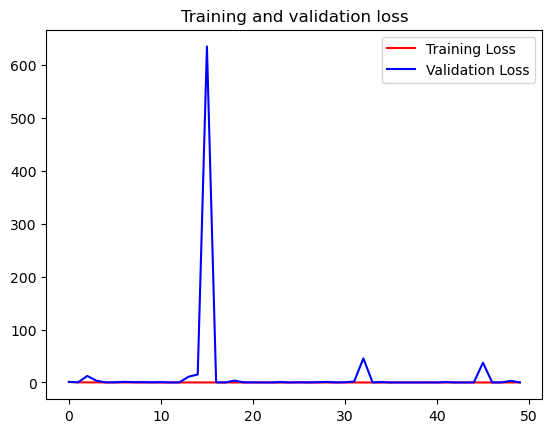

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

C:\Users\ragha\AppData\Local\Temp\ipykernel_13208\141321762.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))


test accuracy: 98.98215532302856


In [21]:
model.save('models\model5.h5')